# Метод распространения меток на основе случайных блужданий (RW-LPA)

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 5: Случайные блуждания на графах"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.matrix_power.html
    * https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

## Вопросы для совместного обсуждения

1\. Обсудите принцип работы алгоритма RW-LPA, принцип построения блочной матрицы $\mathbf{P}$ и матрицы начального состояния меток $\mathbf{Y_0}$.

$$\mathbf{P} = \begin{pmatrix}
\mathbf{P}_{ll}& \mathbf{P}_{lu}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix} = \begin{pmatrix}
\mathbf{I}& \mathbf{0}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix}$$

$$\mathbf{Y_0} = \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{Y_{u}}\\
\end{pmatrix}= \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{0}\\
\end{pmatrix}$$

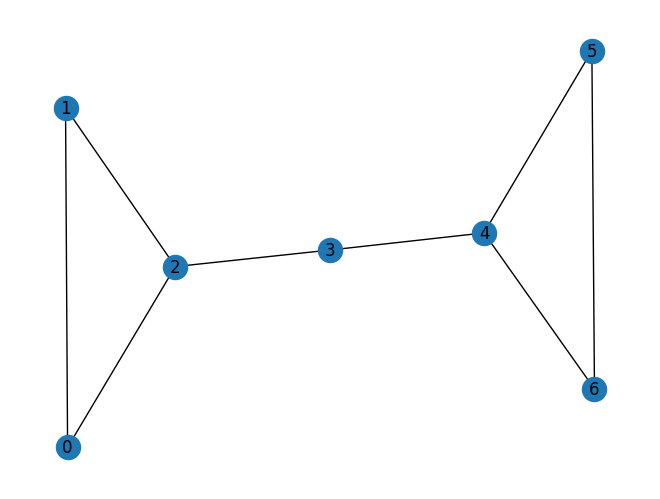

In [437]:
import networkx as nx

G = nx.barbell_graph(3, 1)
nx.draw(G, with_labels=True)

In [438]:
comm1 = [1]
comm2 = [5]
unlabeled = list(set(G).difference(comm1).difference(comm2))

n_comms = 2

In [439]:
nodes_order = [
    *comm1,
    *comm2,
    *unlabeled
]

A = nx.adjacency_matrix(G, nodelist=nodes_order).toarray()
A

array([[0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 0]])

In [440]:
nodes_order

[1, 5, 0, 2, 3, 4, 6]

In [441]:
A[0, 0] = 1
A[1, 1] = 1
A[:2, 2:] = 0
A

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 0]])

In [442]:
import numpy as np

Y = np.zeros((len(G), n_comms))
Y[0, 0] = 1
Y[1, 1] = 1
Y

array([[1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите граф Karate Club. Получите значения атрибута `club`, хранящегося на узлах. Выберите случайным образом 4 узла, относящихся к клубу `Mr. Hi` и 4 узла, относящихся к клубу `Officer`. Получите матрицу смежности, в которой узлы перенумерованы  таким образом, чтобы строки и столбцы с номерами 0, 1, ... 7 принадлежали узлам, которые были выбраны на предыдущем шаге.

- [ ] Проверено на семинаре

In [443]:
import random

In [444]:
G = nx.karate_club_graph()

In [445]:
club = nx.get_node_attributes(G, 'club')
club

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

In [446]:
mr_hi = [node for node, club in club.items() if club == 'Mr. Hi']
officer = [node for node, club in club.items() if club == 'Officer']

In [447]:
mr_hi_4 = random.sample(mr_hi, 4)
officer_4 = random.sample(officer, 4)

In [448]:
mr_hi_4

[5, 11, 3, 2]

In [449]:
officer_4

[27, 15, 26, 32]

In [450]:
unlabeled = list(set(G).difference(mr_hi_4).difference(officer_4))

In [451]:
nodes_order = [
    *mr_hi_4,
    *officer_4,
    *unlabeled
]



In [452]:
print(nodes_order)

[5, 11, 3, 2, 27, 15, 26, 32, 0, 1, 4, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 33]


In [453]:
A = nx.adjacency_matrix(G, nodelist=nodes_order, weight = None).toarray()
A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0]])

<p class="task" id="2"></p>

2\. Получите блочную матрицу $\mathbf{P}$ и матрицу начального состояния меток $\mathbf{Y_0} \in \{0,1\}^{N\times2}$
$$\mathbf{P} = \begin{pmatrix}
\mathbf{P}_{ll}& \mathbf{P}_{lu}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix} = \begin{pmatrix}
\mathbf{I}& \mathbf{0}\\
\mathbf{P}_{ul}& \mathbf{P}_{uu}\\
\end{pmatrix}$$

$$\mathbf{Y_0} = \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{Y_{u}}\\
\end{pmatrix}= \begin{pmatrix}
\mathbf{Y_{l}}\\
\mathbf{0}\\
\end{pmatrix}$$

Выведите на экран след матрицы $\mathbf{P}$. Выведите на экран количество ненулевых элементов матрицы $\mathbf{Y_0}$

- [ ] Проверено на семинаре

In [454]:
import numpy as np

In [455]:
N_unlabeled = len(unlabeled)
N_labeled = 8

In [456]:
P_ll = np.eye(N_labeled)
P_lu = np.zeros((N_labeled, N_unlabeled))
P_ul = np.zeros((N_unlabeled, N_labeled))
P_uu = nx.adjacency_matrix(G, nodelist=unlabeled, weight=None).toarray()

P = np.block([[P_ll, P_lu], [P_ul, P_uu]])

In [457]:
P

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [458]:
P.trace()

8.0

In [459]:
Y_l = np.array([[1, 0] if club[node] == 'Mr. Hi' else [0, 1] for node in nodes_order[:8]])
Y_u = np.zeros((len(G) - 8, 2))
Y_0 = np.vstack([Y_l, Y_u])

In [460]:
Y_0

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [461]:
np.count_nonzero(Y_0)

8

<p class="task" id="3"></p>

3\. Известно, что для блочной матрицы справедливо:

$$\mathbf{P}^{\infty} =
\begin{pmatrix}
\mathbf{I}& \mathbf{0}\\
(\mathbf{I}-\mathbf{P}_{uu})^{-1}\mathbf{P}_{ul}& \mathbf{0}\\
\end{pmatrix}$$

Получите оценку $\mathbf{P}^{\infty}$ путем возведения матрицы в достаточно большую степень. Продемонстрируйте, что каждый блок полученной матрицы удовлетворяет формуле выше при помощи функции `np.allclose`.

- [ ] Проверено на семинаре

In [462]:
P_inf = np.linalg.matrix_power(P, 100)

In [463]:
P_inf_ll = P_inf[:N_labeled, :N_labeled]
P_inf_lu = P_inf[:N_labeled, N_labeled:]
P_inf_ul = P_inf[N_labeled:, :N_labeled]
P_inf_uu = P_inf[N_labeled:, N_labeled:]

In [464]:
np.allclose(P_inf_ll, np.eye(N_labeled))

True

In [465]:
np.allclose(P_inf_lu, np.zeros((N_labeled, N_unlabeled)))

True

In [466]:
np.allclose(P_inf_ul, np.dot(np.linalg.inv(np.eye(N_unlabeled) - P_uu), P_ul))

True

In [467]:
np.allclose(P_inf_uu, np.zeros((N_unlabeled, N_unlabeled))) #?

False

<p class="task" id="4"></p>

4\. Используя Базовый вариант RW-LPA , расставьте метки для всех узлов. Визуализируйте сеть, показав цветом контура вокруг узла принадлежность узла к одному из сообществ, а цветом цветом заливки узла - сообщество, к которому узел был отнесен алгоритмом.

![](https://i.imgur.com/R4ZbGEV.png)

- [ ] Проверено на семинаре